**Труфанов Вадим, ИУ5-63,Рубежный контроль №1 <br>
Вариант №17 : Задание №3, Набор данных №1**

# Задание
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

# Дополнительное задание
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

# Решение:

1. Загрузка данных и импорт библиотек:

In [260]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fifa19/data.csv


In [261]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [262]:
# Импорт данных
data = pd.read_csv('/kaggle/input/fifa19/data.csv', sep=",")

2. Получение информации и наборе данных:

In [263]:
# размер набора данных
data.shape


(18207, 89)

In [264]:
# типы колонок
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [265]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [266]:
# Поиск колонок, в которых нет пропусков/недействительных значений
data.columns[data.notna().all()]

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club Logo', 'Value', 'Wage', 'Special'],
      dtype='object')

3. Подбор колонок для преобразования категориальных признаков в количественные

In [267]:
# Поиск категориальных признаков, в которых мало уникальных значений
uniqueObj = data.select_dtypes(include=['object']).nunique().sort_values().head(5)
print(uniqueObj)

Preferred Foot     2
Real Face          2
Work Rate          9
Body Type         10
Height            21
dtype: int64


In [268]:
# Вывод категориальных признаков с указанием уникальных значений
categoryCols = uniqueObj.index.tolist()
for col in data[categoryCols]:
    print(col," : ",data[col].unique(),",количество пустых значений: ",data[col].isnull().sum())

Preferred Foot  :  ['Left' 'Right' nan] ,количество пустых значений:  48
Real Face  :  ['Yes' 'No' nan] ,количество пустых значений:  48
Work Rate  :  ['Medium/ Medium' 'High/ Low' 'High/ Medium' 'High/ High' 'Medium/ High'
 'Medium/ Low' 'Low/ High' 'Low/ Medium' 'Low/ Low' nan] ,количество пустых значений:  48
Body Type  :  ['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal' 'Courtois' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa' nan] ,количество пустых значений:  48
Height  :  ["5'7" "6'2" "5'9" "6'4" "5'11" "5'8" "6'0" "5'6" "5'10" "6'6" "6'1" "5'4"
 "6'3" "5'5" "6'5" "6'7" "5'3" "5'2" "6'8" "5'1" "6'9" nan] ,количество пустых значений:  48


In [269]:
# Проверка на связь строк, в которых неопределенные значения, чтобы удалить их из датасета
data[(data[categoryCols[0]].isnull())][categoryCols]

,Preferred Foot,Real Face,Work Rate,Body Type,Height
13236,NaN,NaN,NaN,NaN,NaN
13237,NaN,NaN,NaN,NaN,NaN
13238,NaN,NaN,NaN,NaN,NaN
13239,NaN,NaN,NaN,NaN,NaN
13240,NaN,NaN,NaN,NaN,NaN
13241,NaN,NaN,NaN,NaN,NaN
13242,NaN,NaN,NaN,NaN,NaN
13243,NaN,NaN,NaN,NaN,NaN
13244,NaN,NaN,NaN,NaN,NaN
13245,NaN,NaN,NaN,NaN,NaN


In [270]:
#Удаляем эти строки, так как значения не определены во всех колонках
data = data[data[categoryCols[0]].notna()]
data[(data[categoryCols[0]].isnull())][categoryCols]

,Preferred Foot,Real Face,Work Rate,Body Type,Height


4. Преобразование категориальных признаков способами label encoding и one hot encoding

In [271]:
# импорт из библиотек
from sklearn.preprocessing import LabelEncoder

In [272]:
#Label encoding для выбранной колонки Preferred Foot
le = LabelEncoder()
cat_foot_le = le.fit_transform(data["Preferred Foot"])
print("Preferred Foot,label encoded: ",cat_foot_le)
print("Preferred Foot,unique values: ",np.unique(cat_foot_le))
print("Preferred Foot,source values: ",le.inverse_transform(cat_foot_le))

Preferred Foot,label encoded:  [0 1 1 ... 1 1 1]
Preferred Foot,unique values:  [0 1]
Preferred Foot,source values:  ['Left' 'Right' 'Right' ... 'Right' 'Right' 'Right']


In [273]:
#one-hot encoding для выбранной колонки Work Rate
pd.get_dummies(data["Work Rate"],dummy_na=True,prefix="Rate").head(n=10)

,Rate_High/ High,Rate_High/ Low,Rate_High/ Medium,Rate_Low/ High,Rate_Low/ Low,Rate_Low/ Medium,Rate_Medium/ High,Rate_Medium/ Low,Rate_Medium/ Medium,Rate_nan
0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0


5. Поиск колонки для масштабрования данных

In [274]:
#Выборка 20 количественных признаков с количеством уникальных значений меньше 1000
quantityCols = data.select_dtypes(exclude=['object']).nunique().where(lambda x : x<1000).sort_values(ascending=False).head(20)
print(quantityCols)

Jersey Number      99.0
Dribbling          94.0
Positioning        94.0
Finishing          93.0
Marking            92.0
ShotPower          92.0
LongShots          92.0
HeadingAccuracy    91.0
StandingTackle     90.0
FKAccuracy         90.0
BallControl        90.0
Curve              89.0
Crossing           89.0
Interceptions      89.0
SlidingTackle      88.0
Volleys            87.0
Penalties          87.0
Acceleration       86.0
Aggression         85.0
ShortPassing       85.0
dtype: float64


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c6a781860>,
      dtype=object)

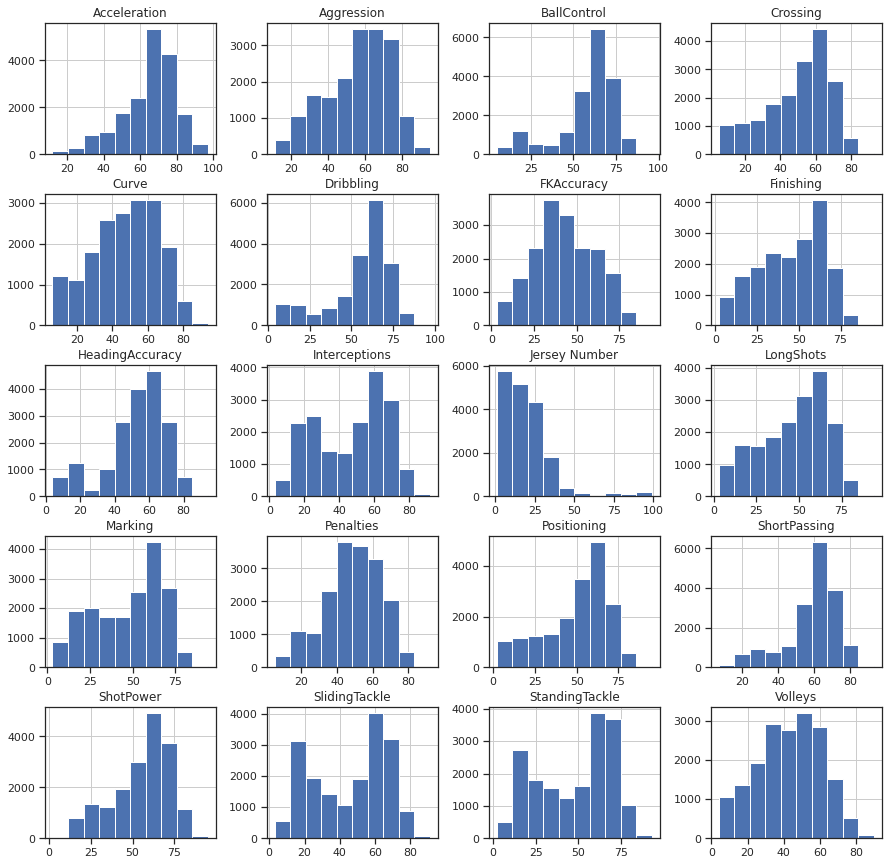

In [280]:
# Гистограммы для этих признаков
data[quantityCols.index.tolist()].hist(figsize=(15,15))

6. Масштабирование данных на основе Z-оценки и MinMax

In [276]:
# импорт из библиотек
from sklearn.preprocessing import MinMaxScaler, StandardScaler

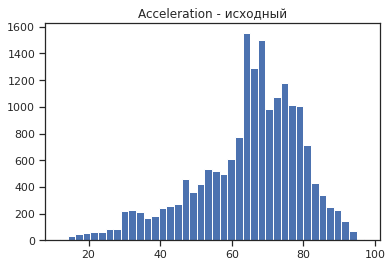

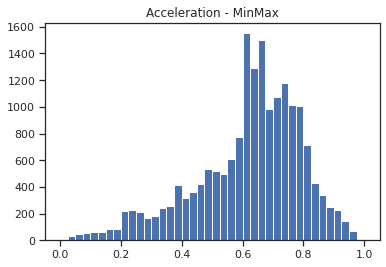

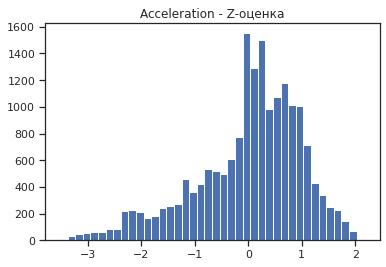

In [277]:
# Выбранная колонка - Acceleration
# MinMax масштабирование
mms = MinMaxScaler()
mms_acceleration = mms.fit_transform(data[['Acceleration']])
# Масштабирование данных на основе Z-оценки
sts = StandardScaler()
sts_acceleration = sts.fit_transform(data[['Acceleration']])
# Построение гистограмм
plt.hist(data['Acceleration'],40)
plt.title("Acceleration - исходный")
plt.show()
plt.hist(mms_acceleration,40)
plt.title("Acceleration - MinMax")
plt.show()
plt.hist(sts_acceleration,40)
plt.title("Acceleration - Z-оценка")
plt.show()

7. Дополнительное задание: ящик с усами

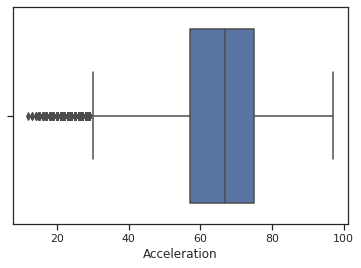

In [278]:
sns.boxplot(x=data['Acceleration'])

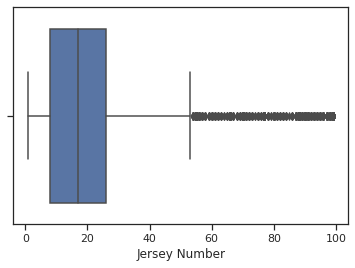

In [279]:
sns.boxplot(x=data['Jersey Number'])

# Вывод
Масштабирование данных и преобразование категориальных признаков в количественные были проведены с учетом характеристих датасета. Были подобраны признаки, которые наглядно продемонстрировали работу этих методов. Для реализации и визуализации были использованы функции из популярных библиотек: pandas, scikit-learn, seaborn, matplotlib